<a href="https://colab.research.google.com/github/ANDRE-33/FIRST_REPOSITORY/blob/main/Projet_final_deep_CRES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten,AveragePooling2D,Dropout

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(X_train_data,Y_train_data),(X_test_data,Y_test_data) = mnist.load_data()
N = X_train_data.shape[0] 
X_train = np.reshape(X_train_data, (N,28,28,1))
X_test = np.reshape(X_test_data, (X_test_data.shape[0],28,28,1))
X_train = X_train/255 
X_test = X_test/255
Y_train = to_categorical(Y_train_data, num_classes=10)
Y_test = to_categorical(Y_test_data, num_classes=10)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#reseau des neuronnes
modele=Sequential()
modele.add(Conv2D(64,kernel_size=6,padding='same', activation='relu',input_shape=(28,28,1)))
modele.add(AveragePooling2D(pool_size=(1,1)))
modele.add(Dropout(0.001))

modele.add(Conv2D(32, kernel_size=6, padding='same',activation='relu'))
modele.add(AveragePooling2D(pool_size=(1,1)))
modele.add(Dropout(0.001))


modele.add(Flatten())
modele.add(Dense(10,activation='softmax'))
modele.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
print(modele.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        2368      
                                                                 
 average_pooling2d (AverageP  (None, 28, 28, 64)       0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        73760     
                                                                 
 average_pooling2d_1 (Averag  (None, 28, 28, 32)       0         
 ePooling2D)                                                     
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 32)        0

In [ ]:
modele.fit(X_train,Y_train,batch_size=64,epochs=1)

938/938 [==============================] - 31s 23ms/step - loss: 0.1242 - accuracy: 0.9629


In [ ]:
score=modele.evaluate(X_test,Y_test, verbose=1)
print('Test loss',score[0])
print('Test accuracy',score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.0550 - accuracy: 0.9809
Test loss 0.05502011254429817
Test accuracy 0.98089998960495


Sortie réseau [7.5778739e-10 6.9492473e-10 6.1874738e-07 1.0788919e-05 1.1014248e-12
 3.7058430e-09 1.8148041e-15 9.9998450e-01 3.9591018e-06 8.9563372e-08]
Chiffre attendu : 7
Chiffre prédit : 7


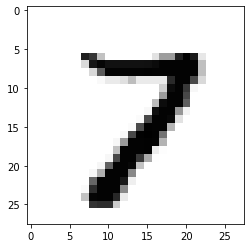

In [ ]:
# Prédiction sur les données de test
Y_predict = modele.predict(X_test)

# Un exemple
i = 34 # numéro de l'image
chiffre_predit = np.argmax(Y_predict[i]) # prédiction par le réseau
print("Sortie réseau", Y_predict[i])
print("Chiffre attendu :", Y_test_data[i])
print("Chiffre prédit :", chiffre_predit)
plt.imshow(X_test_data[i], cmap='Greys')
plt.show()

In [ ]:
modele.save('model_deep_GoogleColab.h5')